# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


### Upgrade Plotly

In [1]:
# %pip install --upgrade plotly

###  Import Statements


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [4]:
df_data = pd.read_csv('NLSY97_subset.csv')[['EARNINGS','S', 'EXP']]

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
df_data.shape

(2000, 3)

In [6]:
df_data.describe()

,EARNINGS,S,EXP
count,"2,000.00","2,000.00","2,000.00"
mean,18.87,14.58,6.72
std,11.95,2.74,2.84
min,2.00,6.00,0.00
25%,11.54,12.00,4.69
50%,15.75,15.00,6.63
75%,22.70,16.00,8.70
max,132.89,20.00,14.73


In [7]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   EARNINGS  2000 non-null   float64
 1   S         2000 non-null   int64  
 2   EXP       2000 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 47.0 KB


In [8]:
df_data.sample(5)

,EARNINGS,S,EXP
368,11.00,14,4.21
1410,31.00,17,6.63
492,15.00,16,6.62
696,12.50,9,10.92
1916,36.32,16,8.63


## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [9]:
df_data.isna().values.sum()

0

In [10]:
df_data.duplicated().values.sum()

514

In [11]:
df_data.drop_duplicates(inplace=True)

## Descriptive Statistics

In [12]:
df_data.describe()

,EARNINGS,S,EXP
count,"1,486.00","1,486.00","1,486.00"
mean,18.81,14.56,6.70
std,12.00,2.77,2.86
min,2.00,6.00,0.00
25%,11.41,12.00,4.66
50%,15.75,15.00,6.63
75%,22.60,16.00,8.71
max,132.89,20.00,14.73


## Visualise the Features

<Figure size 1600x800 with 0 Axes>

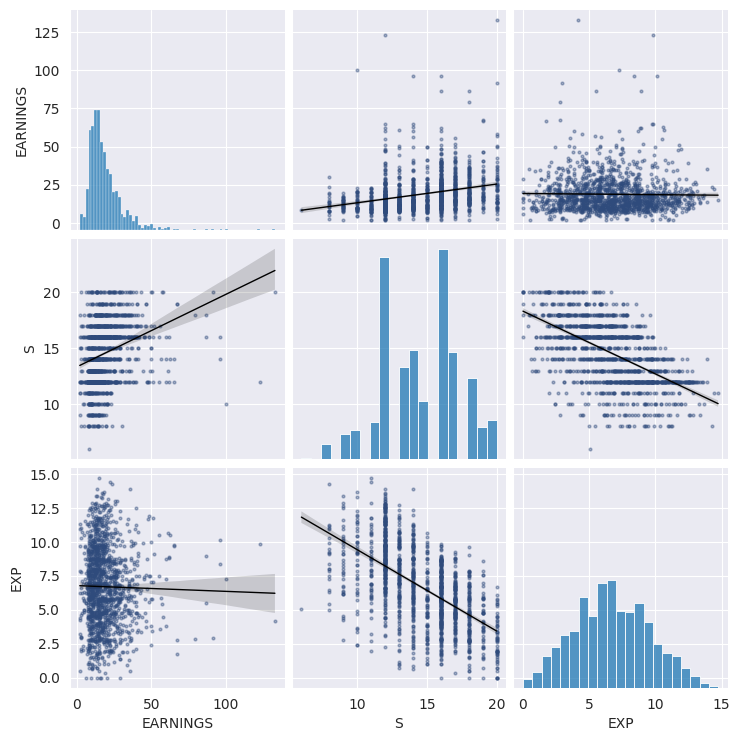

In [13]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
    sns.pairplot(df_data,
                 kind='reg', 
                 plot_kws={
                     'line_kws': {'color': 'black', 'lw': 1}, 
                     'scatter_kws': {'color': '#2f4b7c', 'alpha': 0.4, 's': 4}
                 })
plt.show()

<Figure size 2400x800 with 0 Axes>

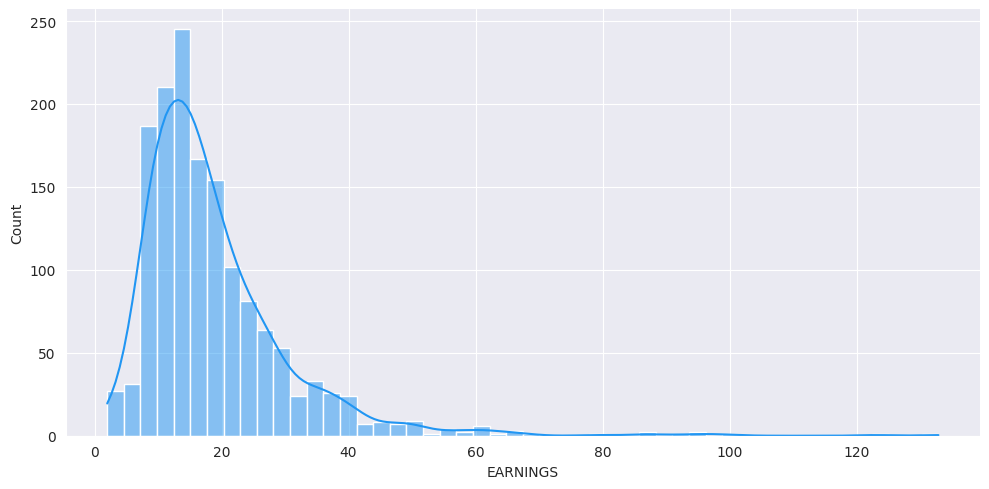

<Figure size 2400x800 with 0 Axes>

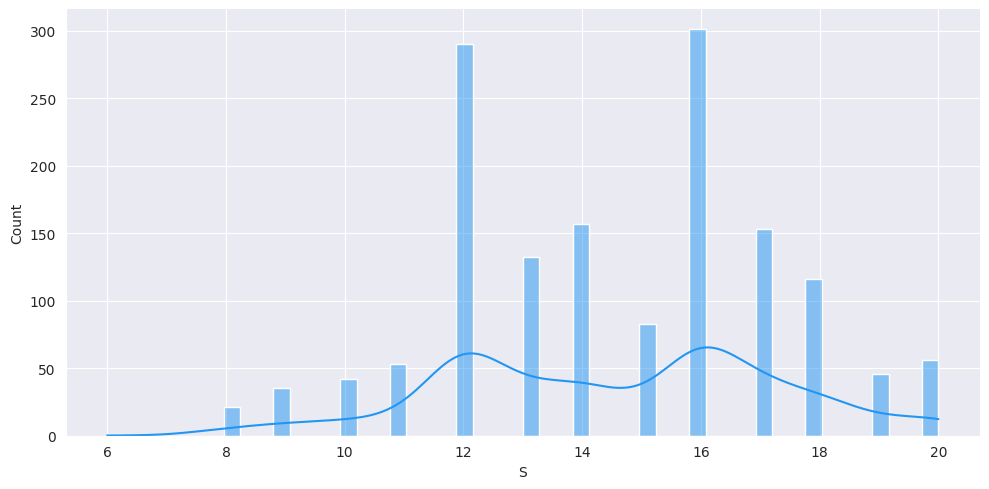

<Figure size 2400x800 with 0 Axes>

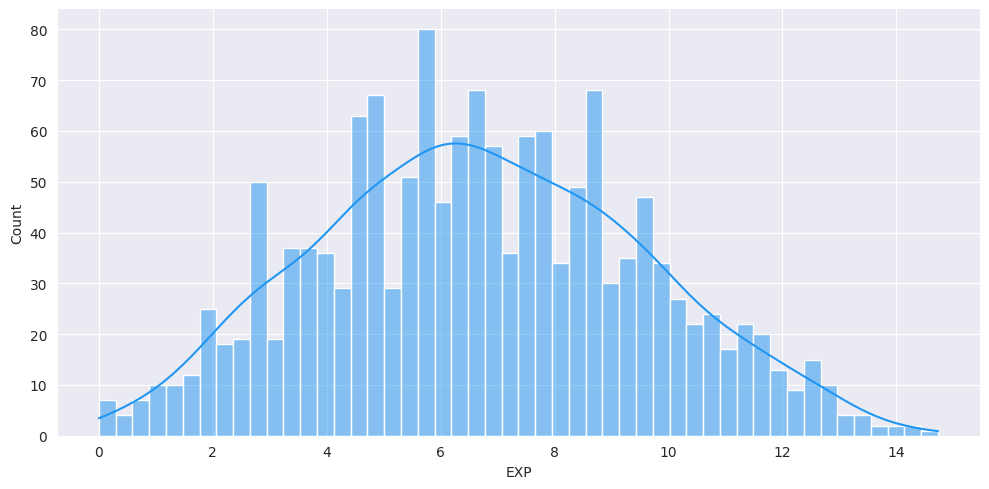

In [14]:
for column in df_data.columns.values:
    plt.figure(figsize=(12, 4), dpi=200)
    with sns.axes_style("darkgrid"):
        sns.displot(data=df_data, x=column, aspect=2, kde=True, color='#2196f3', bins=50)
    plt.show()

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_data.drop(['EARNINGS', 'EXP'], axis=1), df_data.EARNINGS, test_size=0.2, random_state=1)

In [16]:
train_pct = 100*len(X_train)/len(df_data.drop('EARNINGS' , axis=1))
print(f'Training data is {train_pct:.3}% of the total data.')

test_pct = 100*X_test.shape[0]/df_data.drop('EARNINGS' , axis=1).shape[0]
print(f'Test data makes up the remaining {test_pct:0.3}%.')

Training data is 79.9% of the total data.
Test data makes up the remaining 20.1%.


# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

In [17]:
regr = LinearRegression().fit(X_train, y_train)
rsquared = regr.score(X_train, y_train)
print(f'Training data r-squared: {rsquared:.2}')

Training data r-squared: 0.072


### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

In [18]:
regr_coef = pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['Coefficient'])
regr_coef

,Coefficient
S,1.19


In [19]:
expects = regr_coef.loc['S'].values[0]
print(f'The increment of earnings per hour for having an extra year of schooling is ${expects:.5}')

The increment of earnings per hour for having an extra year of schooling is $1.1938


### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

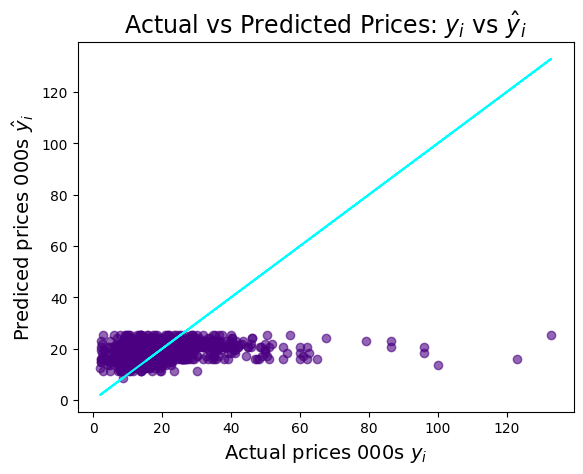

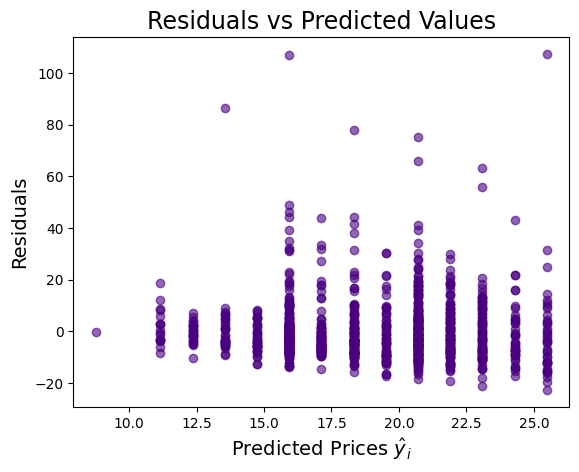

The absolute mean for the residuals of training data is 7.7472


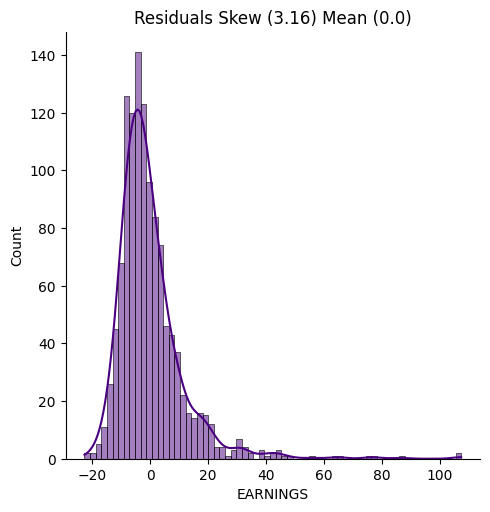

In [20]:
predict_train = regr.predict(X_train)
residuals = (y_train - predict_train)

plt.figure(dpi=100)
plt.scatter(x=y_train, y=predict_train, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual vs Predicted Prices: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.show()
print("")

plt.figure(dpi=100)
plt.scatter(x=predict_train, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

mae_train = mean_absolute_error(y_train, predict_train)
print(f"The absolute mean for the residuals of training data is {mae_train:.5}")

resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

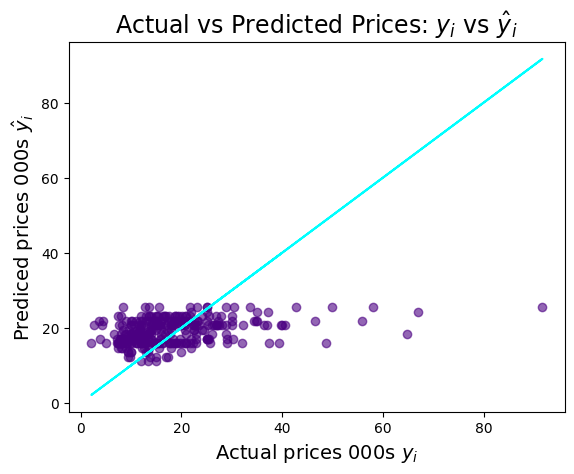

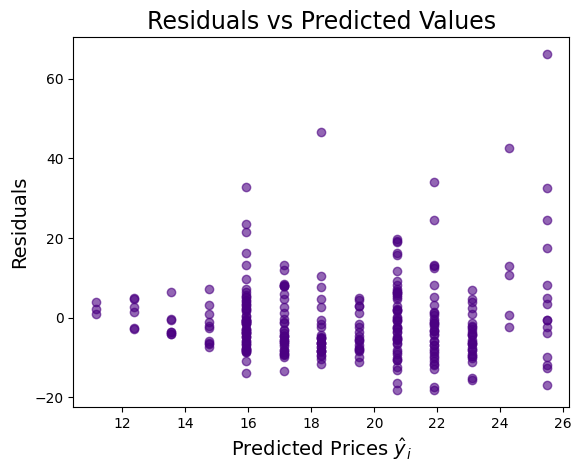

The absolute mean for the residuals of training data is 7.0297


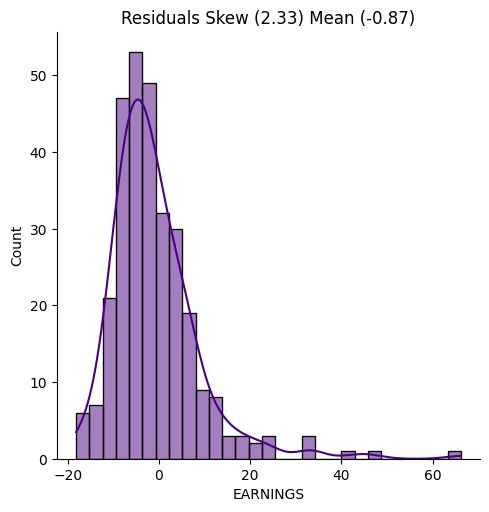

In [21]:
predict_test = regr.predict(X_test)
residuals = (y_test - predict_test)

plt.figure(dpi=100)
plt.scatter(x=y_test, y=predict_test, c='indigo', alpha=0.6)
plt.plot(y_test, y_test, color='cyan')
plt.title(f'Actual vs Predicted Prices: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.show()
print("")

plt.figure(dpi=100)
plt.scatter(x=predict_test, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

mae_test = mean_absolute_error(y_test, predict_test)
print(f"The absolute mean for the residuals of training data is {mae_test:.5}")

resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df_data.drop(['EARNINGS'], axis=1), df_data.EARNINGS, test_size=0.2, random_state=1)

In [23]:
regr = LinearRegression().fit(X_train, y_train)
rsquared = regr.score(X_train, y_train)
print(f'Training data r-squared: {rsquared:.2}')

Training data r-squared: 0.11


### Evaluate the Coefficients of the Model

In [24]:
regr_coef = pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['Coefficient'])
regr_coef

,Coefficient
S,1.80
EXP,1.03


### Analyse the Estimated Values & Regression Residuals

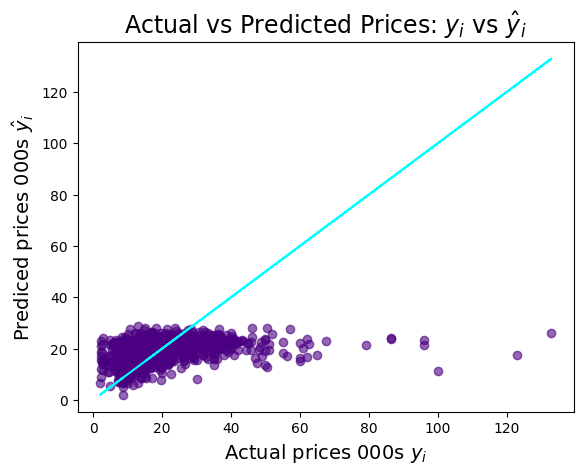

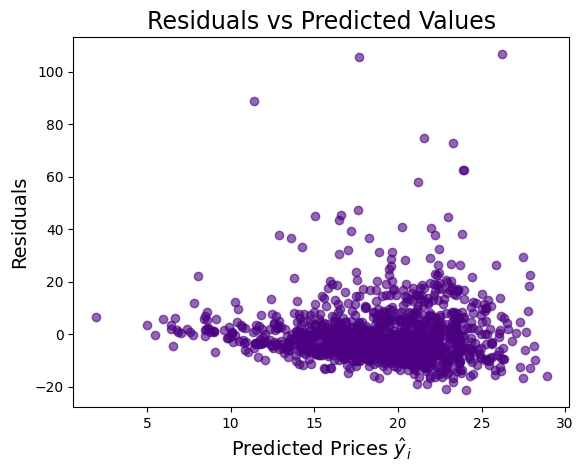

The absolute mean for the residuals of training data is 7.5178


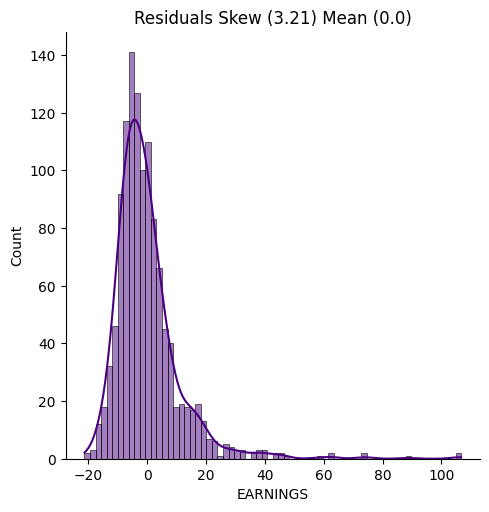

In [25]:
predict_train = regr.predict(X_train)
residuals = (y_train - predict_train)

plt.figure(dpi=100)
plt.scatter(x=y_train, y=predict_train, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual vs Predicted Prices: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.show()
print("")

plt.figure(dpi=100)
plt.scatter(x=predict_train, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

mae_train = mean_absolute_error(y_train, predict_train)
print(f"The absolute mean for the residuals of training data is {mae_train:.5}")

resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

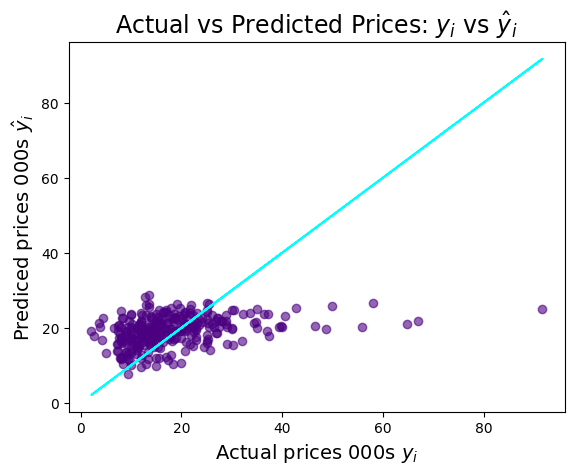

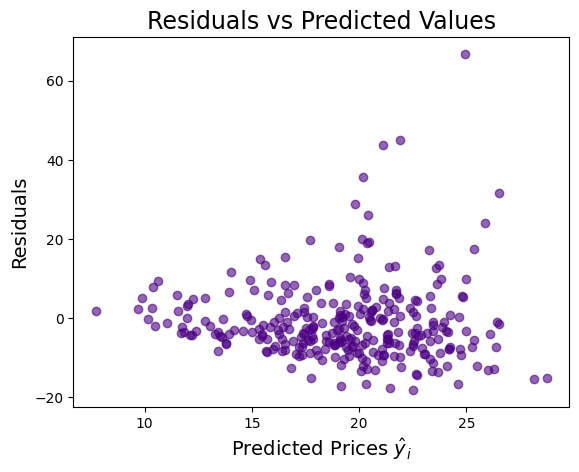

The absolute mean for the residuals of training data is 7.0488


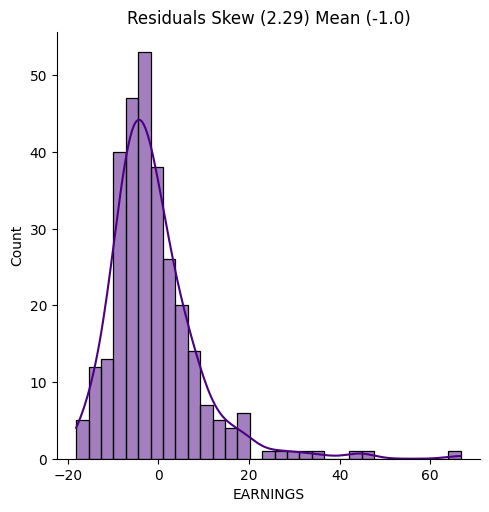

In [26]:
predict_test = regr.predict(X_test)
residuals = (y_test - predict_test)

plt.figure(dpi=100)
plt.scatter(x=y_test, y=predict_test, c='indigo', alpha=0.6)
plt.plot(y_test, y_test, color='cyan')
plt.title(f'Actual vs Predicted Prices: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.show()
print("")

plt.figure(dpi=100)
plt.scatter(x=predict_test, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

mae_test = mean_absolute_error(y_test, predict_test)
print(f"The absolute mean for the residuals of training data is {mae_test:.5}")

resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [27]:
schooling_year = 16
work_experience = 5

In [28]:
new_features = pd.DataFrame(columns=['S', 'EXP'], data=[['16', '5']])
new_prediction = regr.predict(new_features)[0]
print(f"A person with schooling of {schooling_year} years & work experience of {work_experience} years is predicted to have earnings of ${new_prediction:.2f} per hour")

A person with schooling of 16 years & work experience of 5 years is predicted to have earnings of $19.86 per hour


# Experiment and Investigate Further

Which other features could you consider adding to further improve the regression to better predict earnings? 

I would first consider the highest educational qualification (Would be better if including course type), second would be family background variables (parenting actually plays an important in widening children's exposure), third work-related variables (so-called the factors of market rate)